# California house price prediction

# Data exploration

the features in this data include:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('california_housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [40]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
train_data = X_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13705,-117.22,34.12,30.0,2512.0,597.0,1390.0,523.0,2.3725,INLAND,77200.0
16848,-122.42,37.61,37.0,1866.0,300.0,822.0,305.0,4.7000,NEAR OCEAN,341300.0
5869,-118.35,34.18,46.0,1840.0,379.0,866.0,360.0,3.3056,<1H OCEAN,230400.0
4027,-118.55,34.18,32.0,3011.0,529.0,1287.0,525.0,5.0605,<1H OCEAN,311000.0
12334,-116.50,33.98,5.0,4332.0,868.0,1420.0,567.0,4.0417,INLAND,146400.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

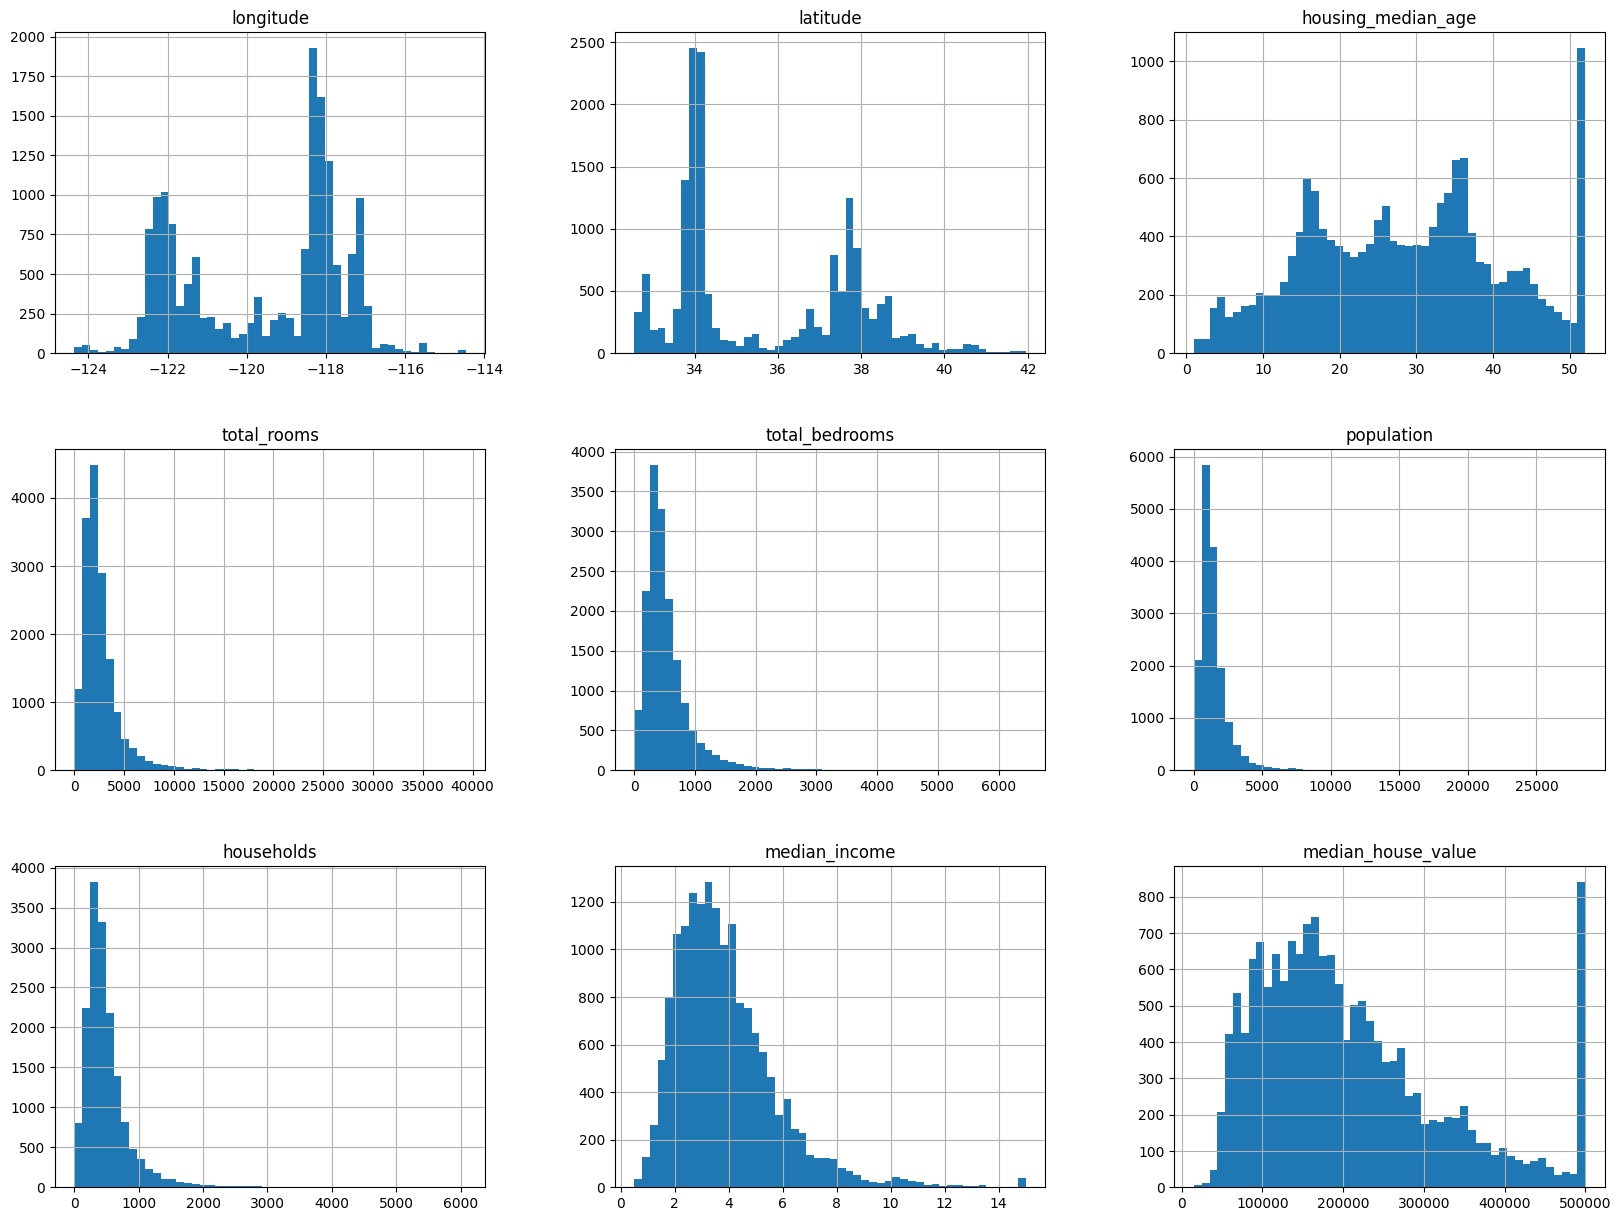

In [43]:
train_data.hist(bins=50, figsize=(20, 15))

C:\Users\Kerimcan\AppData\Local\Temp\ipykernel_22452\3119725513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<AxesSubplot: >

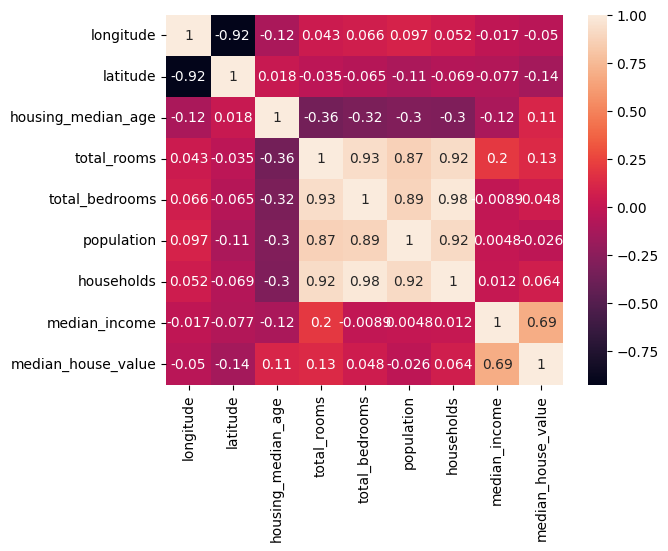

In [44]:
sns.heatmap(train_data.corr(), annot=True)

# Data processing

In [45]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1) 
train_data['population'] = np.log(train_data['population']+1) 
train_data['households'] = np.log(train_data['households']+1) 

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

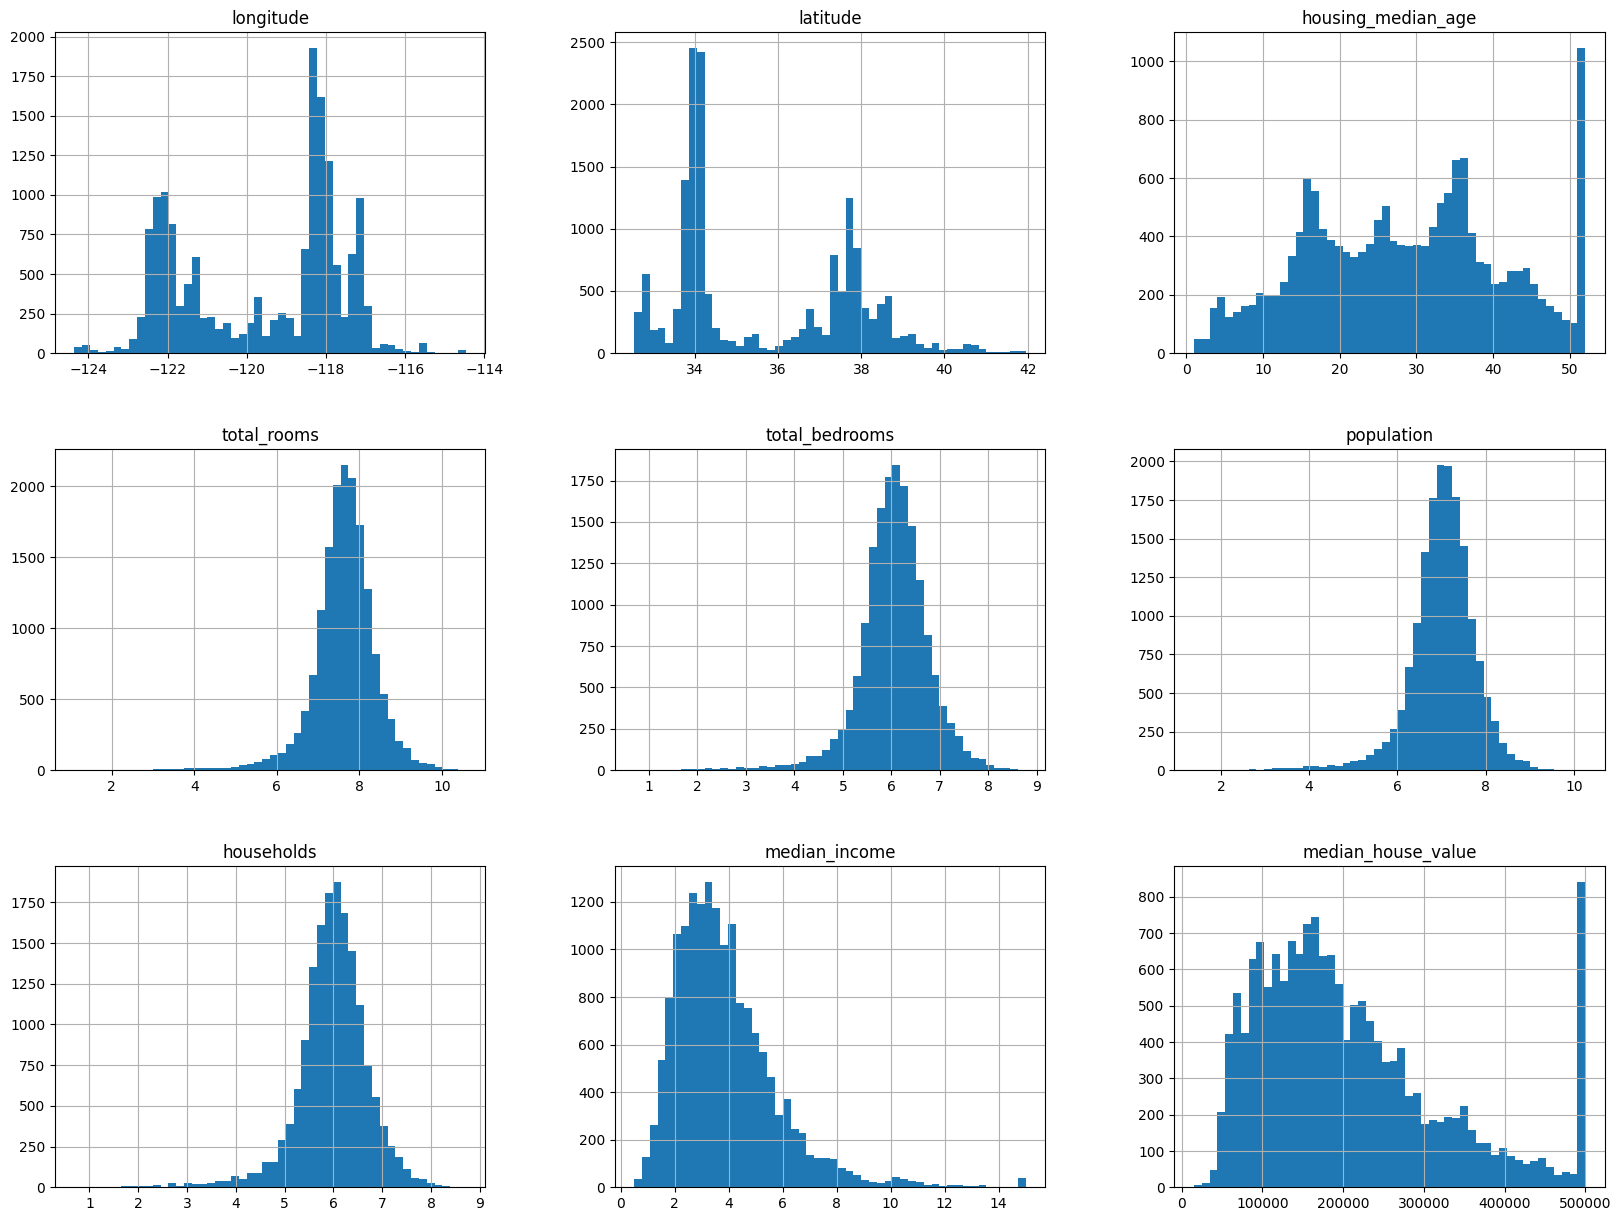

In [46]:
train_data.hist(bins=50, figsize=(20, 15))

house being closer to the ocean is a desirable trait which might impact the house price positivaly.

In [47]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

In [48]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13705,-117.22,34.12,30.0,7.829233,6.393591,7.237778,6.261492,2.3725,77200.0,0,1,0,0,0
16848,-122.42,37.61,37.0,7.532088,5.707110,6.712956,5.723585,4.7000,341300.0,0,0,0,0,1
5869,-118.35,34.18,46.0,7.518064,5.940171,6.765039,5.888878,3.3056,230400.0,1,0,0,0,0
4027,-118.55,34.18,32.0,8.010360,6.272877,7.160846,6.265301,5.0605,311000.0,1,0,0,0,0
12334,-116.50,33.98,5.0,8.374015,6.767343,7.259116,6.342121,4.0417,146400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,-114.66,32.74,17.0,7.236339,5.958425,6.654153,5.771441,1.2049,44000.0,0,1,0,0,0
18,-122.26,37.84,50.0,7.714231,6.122493,6.898715,6.040255,1.9911,158700.0,0,0,0,1,0
15409,-117.24,33.22,20.0,7.582229,5.814131,7.068172,5.857933,4.1316,162500.0,1,0,0,0,0
19293,-122.83,38.40,37.0,7.704361,6.113682,6.927558,6.061457,3.1217,178500.0,1,0,0,0,0


<AxesSubplot: >

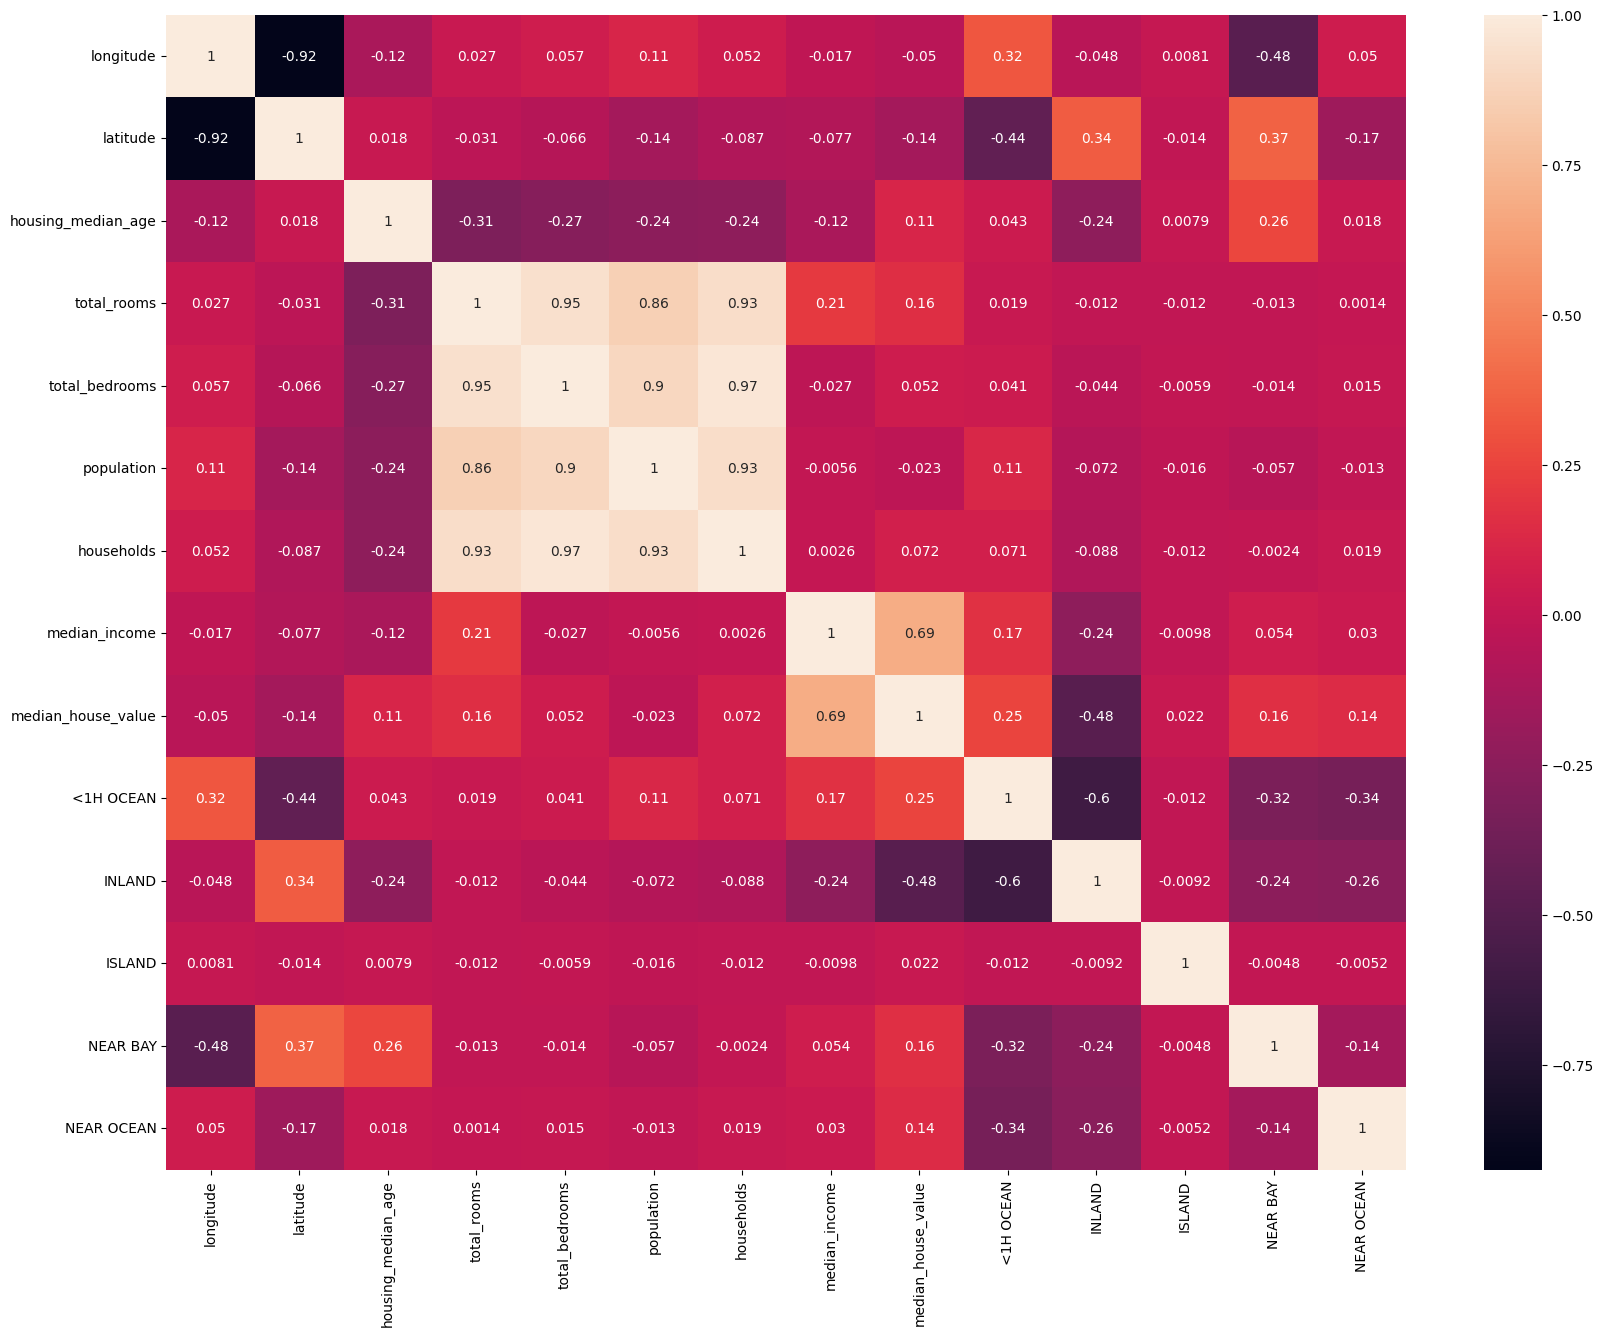

In [49]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(), annot=True)

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

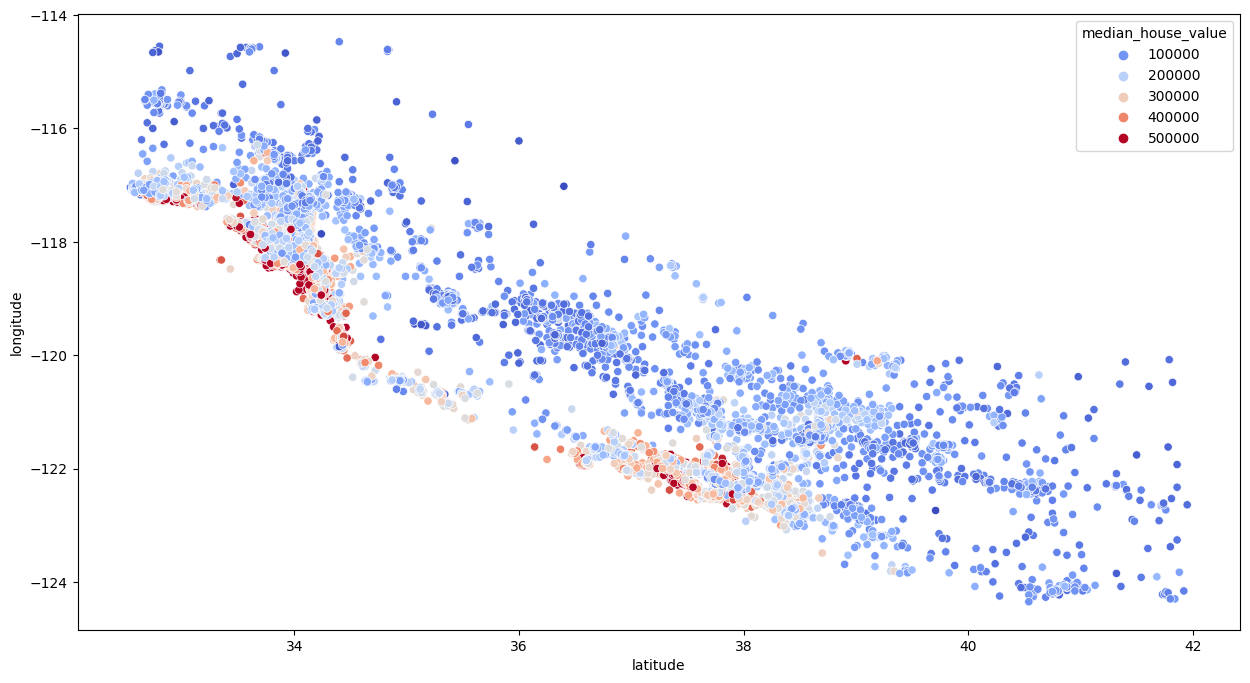

In [50]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')